__Eithar Elfatih Burie Abdelrahman DS2403__

# Student Grade Prediction Project 

__Project Description__

The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades
Columns Description-  total 43 columns

    -Seat No : The enrolled number of candidate that took the exams

    CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.

    · All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

 



# Predict - CGPA of a student based on different grades in four years.

_______________________________________________________________________________________________________________________________

# 1.Data Preparation

__Import necessary libraries__

In [781]:
#Import necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from scipy import stats
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

__Data Cleaning__

In [678]:
#read dataframe for titianic dataset from csv file 
grades_URL='https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv'
df=pd.read_csv(grades_URL)


In [679]:
pd.set_option('display.max_columns', None)

In [680]:
#create dataframe of csv
df_grades=pd.DataFrame(df)
pd.set_option('display.max_columns', None)
#sort index
df.index +=1
#show dataset
df_grades
    

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107,HS-205/20,MT-222,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215,MT-331,EF-303,HS-304,CS-301,CS-302,TC-383,MT-442,EL-332,CS-318,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
1,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,C-,C-,B+,D,A-,B-,C+,D+,D+,D,A,D,C-,C,C-,C+,B,C,C+,B+,C,C-,C,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
2,CS-97002,A,D,D+,D,B-,C,D,A,D+,D,B+,C+,B-,C-,D+,D+,D,C,D,B-,C,D,D+,D,C-,A-,D+,C-,C-,C,A-,D,D+,D,C,D,A-,B-,C,C,B,2.008
3,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,A-,B-,A-,A,A,A,A,A+,A,A-,A,A-,A,A,C+,A,B+,A-,B,A,B+,A-,A-,B,B,A,C,A,A,A,A-,A,3.608
4,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,C+,D,B,D+,B-,D,C,B+,C+,D,D+,D,D,D+,D,B-,D,B-,D+,C-,D+,B+,C-,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
5,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,A-,C,A,A,A-,A-,A-,B-,A,A-,A,A-,A-,C+,C-,A-,B-,A-,C+,A-,A-,B-,A-,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,B+,A+,A,A+,A,A,A,A,A+,A,A,B,A-,A,B,A-,A-,A,A+,A+,A,A,B+,A-,A-,A,A,A,B+,B+,B,A,3.798
568,CS-97568,A+,A,A,A,A,A,A,A-,A,A,A+,B+,C+,A-,B,A,A,A+,A+,A,A,B,A,A,A,A,A,A,A+,A,A+,A-,B+,B+,A,A,A-,B,A-,C,A-,3.772
569,CS-97569,B,A,A-,B+,A,A,A,A,A,B,A+,B-,B,B+,B,A-,A,B+,B,A,B+,B,A,B,B-,B+,B+,A,B+,B,C+,B+,A-,B,A,B+,A,C,B+,A-,A-,3.470
570,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,C-,A+,C+,D,D,B,B-,B,B-,C,B-,D+,D+,C+,D,C,C,C+,C-,C-,D,B-,B+,D,B,B,C-,D,C,B,B-,C,2.193


________________

In [681]:
#show dataset head
df_grades.head(25)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107,HS-205/20,MT-222,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215,MT-331,EF-303,HS-304,CS-301,CS-302,TC-383,MT-442,EL-332,CS-318,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
1,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,C-,C-,B+,D,A-,B-,C+,D+,D+,D,A,D,C-,C,C-,C+,B,C,C+,B+,C,C-,C,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
2,CS-97002,A,D,D+,D,B-,C,D,A,D+,D,B+,C+,B-,C-,D+,D+,D,C,D,B-,C,D,D+,D,C-,A-,D+,C-,C-,C,A-,D,D+,D,C,D,A-,B-,C,C,B,2.008
3,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,A-,B-,A-,A,A,A,A,A+,A,A-,A,A-,A,A,C+,A,B+,A-,B,A,B+,A-,A-,B,B,A,C,A,A,A,A-,A,3.608
4,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,C+,D,B,D+,B-,D,C,B+,C+,D,D+,D,D,D+,D,B-,D,B-,D+,C-,D+,B+,C-,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
5,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,A-,C,A,A,A-,A-,A-,B-,A,A-,A,A-,A-,C+,C-,A-,B-,A-,C+,A-,A-,B-,A-,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
6,CS-97006,A,B-,B,D+,C+,A-,C+,B,B+,B+,C-,A-,B-,B+,A-,B+,B,A-,B,A-,A-,C+,B+,C-,A-,B-,C+,B,A-,A-,B-,B+,C,B-,C+,C+,A-,A-,B+,B-,B,3.026
7,CS-97007,B-,C-,A-,D,A-,B,A,B+,A-,B+,A-,A,C,C+,C-,B-,B-,B+,C,A,C+,C-,C+,C+,B+,B+,B,C-,B+,A-,C,C+,B-,C,B+,B-,A,A-,B+,B+,A,2.957
8,CS-97008,B+,B+,C+,C,C,A-,C-,A-,B,A-,B+,A,B+,B+,C,A-,B+,A-,C,A-,C+,C,C,C+,A-,D+,A-,C,A-,B,B,B+,D+,B+,B+,C,A,B+,A-,A-,A-,3.043
9,CS-97009,A-,C,A-,D+,B,A-,A-,A-,B+,A-,A-,A,A,A-,B-,A-,A-,A,B-,A+,C+,C+,A-,C-,B+,B,B,B+,A,A-,B+,A-,B+,B,B-,C+,A,A-,B+,A-,A,3.358
10,CS-97010,A,B,C+,B,B,A-,C,B-,A-,A,C+,A-,B-,A,A-,A,B-,A,B-,A-,B-,A-,B,B+,A-,B-,B-,C+,B,B+,B-,A-,C+,B-,B+,B-,A,A,A-,B,A,3.247


____________

In [682]:
#show dataset tail 
df_grades.tail(10)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107,HS-205/20,MT-222,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215,MT-331,EF-303,HS-304,CS-301,CS-302,TC-383,MT-442,EL-332,CS-318,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
562,CS-97562,B-,B,A-,B+,B-,B+,A-,A,B,B,C,B+,B-,B+,B-,A-,C+,B,A,A,B,B-,A,B+,C+,B-,C,C,B+,C,D,D,B+,B-,B+,D+,C+,B-,B+,C,C+,2.828
563,CS-97563,B,B,A,C,B,B+,B,C-,B+,B+,B-,C+,C-,C+,B,C+,C+,B-,C,C,C+,B,A,B-,C+,B-,B,B,A-,C+,C,B-,A-,B,B+,B+,B+,C+,A-,D+,C+,2.821
564,CS-97564,A-,B,A,D+,B+,A-,C,A,C+,C,B,B,B+,B,C,B,B,A,C-,C,C,C+,A,B,C+,C,B+,B,B+,C-,B-,C-,B+,C,B+,C-,C-,C,F,D,C,2.612
565,CS-97565,A-,D,A,C,B+,B+,C,A-,B-,D,B+,B,C-,B,C,B+,B-,C+,B+,A-,C,B+,C+,B-,C+,B,B-,C+,C+,C,D,C-,B,C+,B+,D+,C,C-,B,C,B-,2.607
566,CS-97566,F,F,D,C-,NaN,D+,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.800
567,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,B+,A+,A,A+,A,A,A,A,A+,A,A,B,A-,A,B,A-,A-,A,A+,A+,A,A,B+,A-,A-,A,A,A,B+,B+,B,A,3.798
568,CS-97568,A+,A,A,A,A,A,A,A-,A,A,A+,B+,C+,A-,B,A,A,A+,A+,A,A,B,A,A,A,A,A,A,A+,A,A+,A-,B+,B+,A,A,A-,B,A-,C,A-,3.772
569,CS-97569,B,A,A-,B+,A,A,A,A,A,B,A+,B-,B,B+,B,A-,A,B+,B,A,B+,B,A,B,B-,B+,B+,A,B+,B,C+,B+,A-,B,A,B+,A,C,B+,A-,A-,3.470
570,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,C-,A+,C+,D,D,B,B-,B,B-,C,B-,D+,D+,C+,D,C,C,C+,C-,C-,D,B-,B+,D,B,B,C-,D,C,B,B-,C,2.193
571,CS-97571,C,D,D,C,C,D+,B,C+,C,D+,B-,C+,C-,B+,D+,B+,C-,B,D+,C-,C,D+,C,D,F,D,D,C,A-,F,C-,D+,C+,C,B-,D,F,C-,B+,D,C-,1.753


In [683]:
# show shape
df_grades.shape


(571, 43)

In [803]:
df_grades.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [684]:
grades_flat=pd.Series(df_grades.values.flatten())
grandes_count=grades_flat.value_counts()

In [685]:
df_grades.nunique()

Seat No.     571
PH-121        13
HS-101        12
CY-105        13
HS-105/12     13
MT-111        13
CS-105        11
CS-106        13
EL-102        13
EE-119        12
ME-107        13
CS-107        14
HS-205/20     13
MT-222        14
EE-222        13
MT-224        14
CS-210        14
CS-211        14
CS-203        13
CS-214        13
EE-217        13
CS-212        12
CS-215        14
MT-331        12
EF-303        12
HS-304        14
CS-301        12
CS-302        11
TC-383        12
MT-442        12
EL-332        13
CS-318        14
CS-306        13
CS-312        14
CS-317        12
CS-403        11
CS-421        13
CS-406        14
CS-414        13
CS-419        12
CS-423        12
CS-412        13
CGPA         491
dtype: int64

__COMMENT:__ 

In [686]:
#show info

df_grades.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 1 to 571
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

__COMMENT:__ all columns are type 'object', except 'CGPA' which is flaot 64. 

In [687]:
#show column values 
df_grades.columns.values

array(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107',
       'HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211',
       'CS-203', 'CS-214', 'EE-217', 'CS-212', 'CS-215', 'MT-331',
       'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442',
       'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA'],
      dtype=object)

__COMMENTS:__ the columns ' Seat No.' and 'CGPA' are continous data and the rest are categorical data.


   


__Handling null values__

In [688]:
#check for null values 
df_grades.isnull().sum().sum()

425

__COMMENT:__

There are 425 missing values of grades. this is over various subjects so it cant be removed as it would change the results drastically. 
    to fix this i will fill in the Nan values by the mode, as the data is categorical so the most frequent value would be best fit.

In [689]:
#check for duplicates
df_grades.duplicated().value_counts()


False    571
dtype: int64

__COMMENT:__ no duplicates

In [690]:
#fill in Nan values with mode 

for col in df_grades.columns:
    mode_=df_grades[col].mode()[0]
    df_grades[col].fillna(mode_, inplace=True)



In [691]:
#check for null values after filling in 
df_grades.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [692]:
df_grades

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107,HS-205/20,MT-222,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215,MT-331,EF-303,HS-304,CS-301,CS-302,TC-383,MT-442,EL-332,CS-318,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
1,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,C-,C-,B+,D,A-,B-,C+,D+,D+,D,A,D,C-,C,C-,C+,B,C,C+,B+,C,C-,C,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
2,CS-97002,A,D,D+,D,B-,C,D,A,D+,D,B+,C+,B-,C-,D+,D+,D,C,D,B-,C,D,D+,D,C-,A-,D+,C-,C-,C,A-,D,D+,D,C,D,A-,B-,C,C,B,2.008
3,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,A-,B-,A-,A,A,A,A,A+,A,A-,A,A-,A,A,C+,A,B+,A-,B,A,B+,A-,A-,B,B,A,C,A,A,A,A-,A,3.608
4,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,C+,D,B,D+,B-,D,C,B+,C+,D,D+,D,D,D+,D,B-,D,B-,D+,C-,D+,B+,C-,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
5,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,A-,C,A,A,A-,A-,A-,B-,A,A-,A,A-,A-,C+,C-,A-,B-,A-,C+,A-,A-,B-,A-,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,B+,A+,A,A+,A,A,A,A,A+,A,A,B,A-,A,B,A-,A-,A,A+,A+,A,A,B+,A-,A-,A,A,A,B+,B+,B,A,3.798
568,CS-97568,A+,A,A,A,A,A,A,A-,A,A,A+,B+,C+,A-,B,A,A,A+,A+,A,A,B,A,A,A,A,A,A,A+,A,A+,A-,B+,B+,A,A,A-,B,A-,C,A-,3.772
569,CS-97569,B,A,A-,B+,A,A,A,A,A,B,A+,B-,B,B+,B,A-,A,B+,B,A,B+,B,A,B,B-,B+,B+,A,B+,B,C+,B+,A-,B,A,B+,A,C,B+,A-,A-,3.470
570,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,C-,A+,C+,D,D,B,B-,B,B-,C,B-,D+,D+,C+,D,C,C,C+,C-,C-,D,B-,B+,D,B,B,C-,D,C,B,B-,C,2.193


__Encoding grades__

In [694]:
# encode grades 

lab_en=LabelEncoder()
for col in df_grades.columns:
    if col != 'Seat No.' and col !='CGPA':
        df_grades[col]=lab_en.fit_transform(df_grades[col])
df_grades.head()


,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107,HS-205/20,MT-222,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215,MT-331,EF-303,HS-304,CS-301,CS-302,TC-383,MT-442,EL-332,CS-318,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
1,CS-97001,5,10,8,6,8,10,9,8,5,8,8,4,9,2,5,7,10,10,9,0,9,8,6,7,7,3,6,7,4,6,8,6,8,8,8,8,2,0,8,3,2,2.205
2,CS-97002,0,9,10,9,5,6,9,0,10,9,4,7,5,8,10,10,9,6,9,5,6,9,10,8,8,2,10,8,8,6,2,9,10,9,6,9,2,5,6,6,3,2.008
3,CS-97003,0,3,0,5,4,0,5,4,2,2,5,2,0,0,0,0,1,0,2,0,2,0,0,6,0,4,2,3,0,4,2,2,3,3,0,6,0,0,0,2,0,3.608
4,CS-97004,9,7,10,9,9,2,10,8,9,7,9,3,10,5,9,6,4,7,9,10,9,9,10,8,5,9,5,10,8,10,4,8,10,6,10,8,5,3,7,7,7,1.906
5,CS-97005,2,2,2,4,0,0,2,4,0,2,6,0,0,2,2,2,5,0,2,0,2,2,7,7,2,5,2,7,2,2,5,2,5,4,4,5,2,0,2,2,0,3.448


0 being A+ and 13 being WU

from this we can see that on average the majority of students get high results 



__DROP UNNECESSARY COLUMNS__

In [695]:
ex_cols=['Seat No.', 'CGPA']
grad_col=df.columns.difference(ex_cols)
stack_df=df_grades[grad_col].stack()
g_count=stack_df.value_counts().sort_index()
g_count

per_=stack_df.value_counts(normalize=True).sort_index()*100
per_

grades_sum= pd.DataFrame({
    'Count': g_count,
    'Percentage': per_
})
grades_sum

,Count,Percentage
0,3535,15.099739
1,764,3.263423
2,4728,20.195635
3,2639,11.272479
4,2757,11.776515
5,2190,9.354577
6,1609,6.872838
7,1554,6.637905
8,1304,5.570031
9,1053,4.497886


In [698]:
df_=df_grades.drop(columns=['Seat No.'])
df_.sample(10)


,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107,HS-205/20,MT-222,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215,MT-331,EF-303,HS-304,CS-301,CS-302,TC-383,MT-442,EL-332,CS-318,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
81,10,5,8,9,9,4,2,5,3,6,5,2,8,2,5,4,5,4,4,4,5,5,7,5,4,3,4,8,4,5,3,5,7,7,7,5,0,0,4,3,2,2.815
165,0,4,3,3,2,0,4,7,4,5,2,3,5,0,5,2,6,5,7,2,6,6,6,5,7,7,4,5,7,3,3,2,6,6,5,7,2,2,5,7,2,2.918
289,9,8,9,6,9,9,5,11,10,11,11,11,12,0,2,2,12,10,6,2,9,11,0,2,2,2,2,0,2,2,2,2,1,5,0,3,2,0,2,2,2,0.998
415,9,4,2,6,6,0,3,2,7,6,4,3,5,3,4,5,0,8,2,0,3,4,0,4,2,3,7,0,4,5,4,7,1,8,2,5,2,0,4,2,3,3.103
339,2,0,3,4,0,5,3,0,3,5,4,3,4,3,2,4,0,7,4,2,2,2,2,4,5,2,4,4,0,2,6,4,1,4,2,4,2,2,2,4,4,3.408
235,1,0,0,1,0,1,2,2,2,2,1,0,0,2,0,5,0,2,0,2,2,7,4,3,2,0,0,2,2,2,2,0,2,0,0,4,4,0,0,1,0,3.754
439,2,9,0,4,3,0,4,3,2,4,3,3,5,2,3,0,0,4,3,4,4,3,2,3,5,4,2,2,2,5,5,8,4,6,4,3,4,7,3,2,4,3.219
153,2,2,0,1,2,0,0,7,0,4,0,2,0,0,2,2,6,2,7,2,5,7,9,3,8,3,4,0,2,4,2,2,4,5,3,4,2,0,2,7,2,3.365
263,2,3,4,2,2,0,3,3,5,2,5,4,8,2,10,5,6,2,7,10,7,8,2,7,2,8,5,8,10,2,6,5,10,6,7,9,0,2,5,10,4,2.704
528,8,9,3,4,8,5,7,3,7,4,2,3,9,6,3,9,10,9,7,10,6,7,4,9,6,5,9,5,3,10,11,9,9,9,0,11,10,9,7,8,11,1.957


<Axes: >

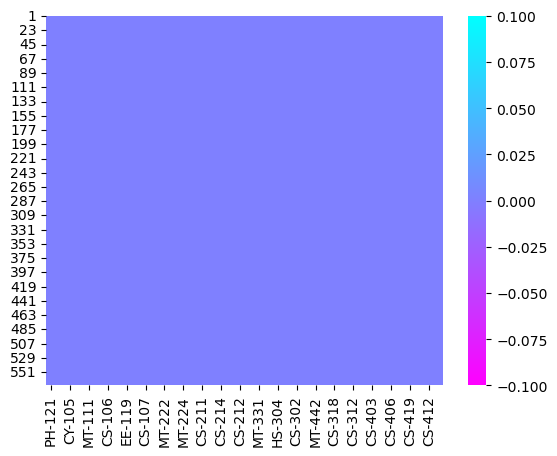

In [699]:
# heatmap
sns.heatmap(df_.isnull(), cmap='cool_r')

In [700]:
df_.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107,HS-205/20,MT-222,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215,MT-331,EF-303,HS-304,CS-301,CS-302,TC-383,MT-442,EL-332,CS-318,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,3.781086,5.071804,2.898424,4.241681,3.896673,2.838879,4.122592,3.959720,3.886165,4.779335,4.068301,2.975482,4.714536,3.390543,4.241681,3.520140,4.891419,4.409807,5.008757,3.455342,4.549912,4.697023,3.604203,4.371278,4.516637,4.218914,3.534151,4.106830,3.059545,4.129597,4.891419,4.106830,4.071804,4.835377,3.432574,5.385289,2.984238,2.397548,3.856392,3.966725,3.049037,2.954888
std,3.046895,2.785317,2.964737,3.200507,2.988546,2.696709,2.727192,3.031436,2.657528,3.146202,3.260701,2.352176,3.300842,2.988254,3.080968,2.735895,3.189695,3.077965,2.996184,2.696200,2.776887,3.087208,3.094009,2.471341,2.659175,2.841928,2.504762,3.190029,2.772033,2.911685,2.960935,2.855123,3.362345,2.740382,2.980685,2.729063,2.468346,2.499388,2.382769,2.795475,2.332316,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.000000,3.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,3.000000,0.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.538000
50%,3.000000,5.000000,2.000000,4.000000,4.000000,2.000000,4.000000,3.000000,3.000000,5.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,5.000000,4.000000,5.000000,3.000000,4.000000,5.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,2.000000,4.000000,5.000000,4.000000,3.000000,5.000000,3.000000,5.000000,2.000000,2.000000,4.000000,4.000000,2.000000,3.029000
75%,6.000000,7.000000,4.500000,7.000000,6.000000,4.000000,5.000000,6.000000,6.000000,8.000000,7.000000,4.000000,8.000000,5.000000,7.000000,5.000000,8.000000,7.000000,7.000000,5.000000,6.000000,7.000000,6.000000,6.000000,6.000000,6.000000,5.000000,7.000000,4.000000,6.000000,7.000000,6.000000,7.000000,7.000000,5.000000,7.000000,4.000000,4.000000,5.000000,6.000000,4.000000,3.451000
max,12.000000,11.000000,12.000000,12.000000,12.000000,10.000000,12.000000,12.000000,11.000000,12.000000,13.000000,12.000000,13.000000,12.000000,13.000000,13.000000,13.000000,12.000000,12.000000,12.000000,11.000000,13.000000,11.000000,11.000000,13.000000,11.000000,10.000000,11.000000,11.000000,12.000000,13.000000,12.000000,13.000000,11.000000,10.000000,12.000000,13.000000,12.000000,11.000000,11.000000,12.000000,3.985000


. difference between max and 75% is large
.

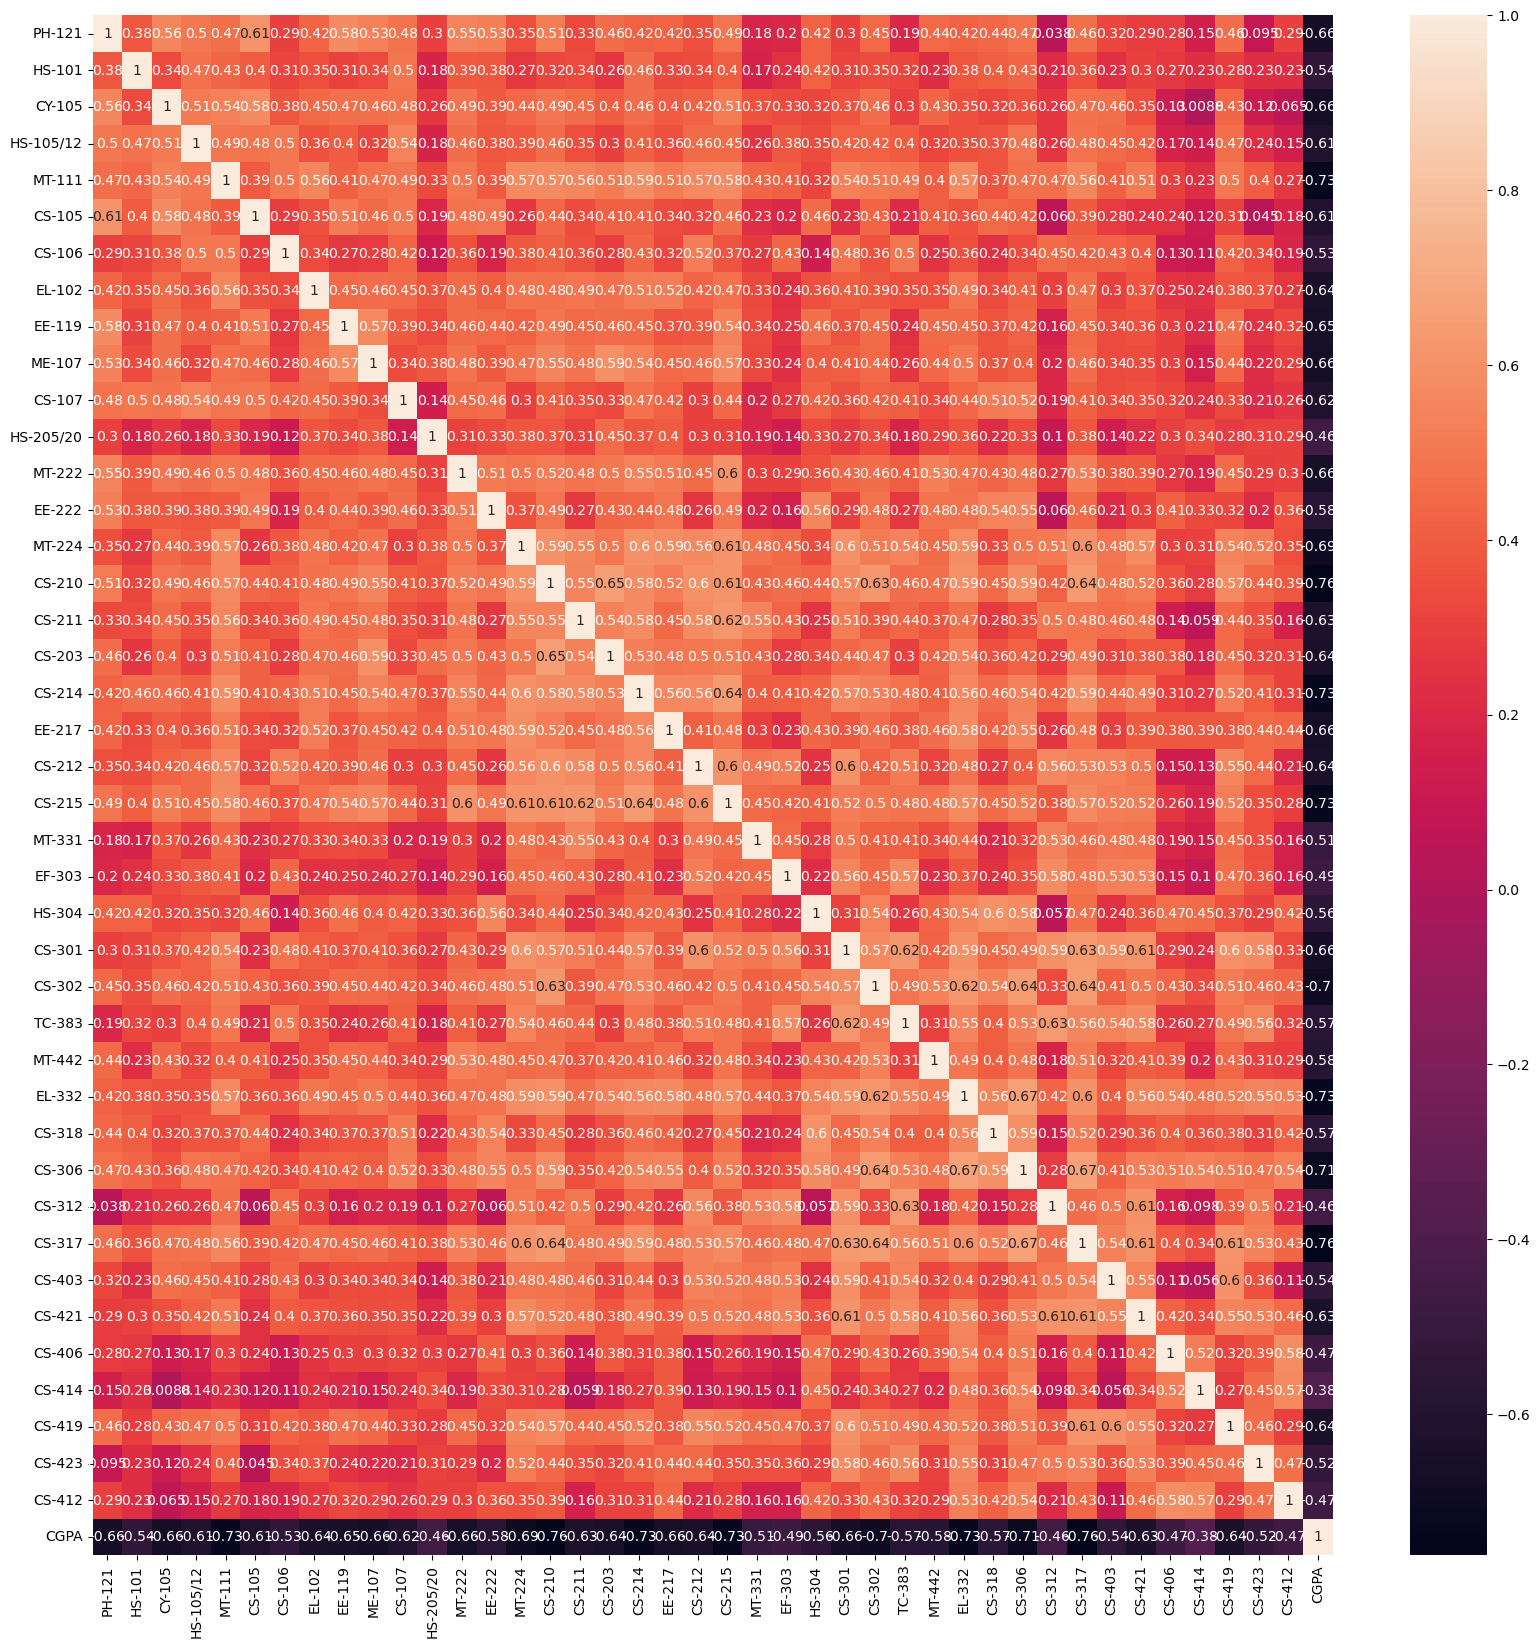

In [550]:
corr_=df_.corr()

plt.figure(figsize=(20,20))
sns.heatmap(df_.corr(), annot=True)
plt.show()

now the df is ready to do graph anaylsis 

# Univariate anaylsis 

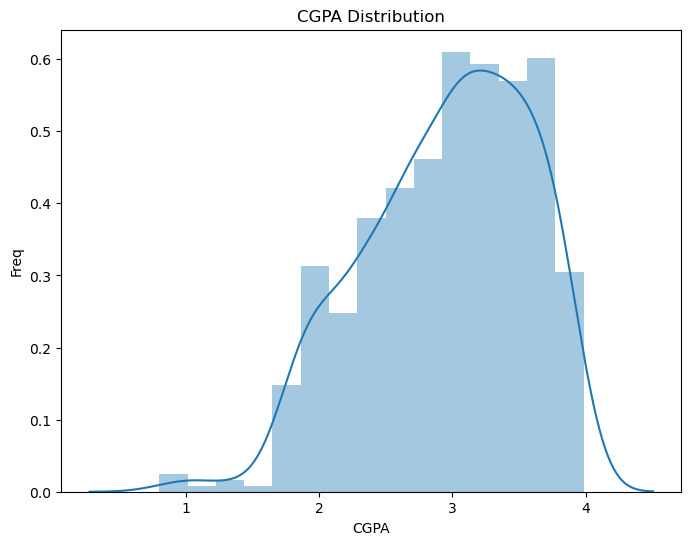

In [701]:
#
plt.figure(figsize=(8,6))
sns.distplot(df_['CGPA'], kde=True)
plt.title('CGPA Distribution')
plt.xlabel('CGPA')
plt.ylabel('Freq')
plt.show()

__COMMENT:__
    
    .In the majority of subjects, most students score well( A or A-)
    .majority of subjects have left skewness 

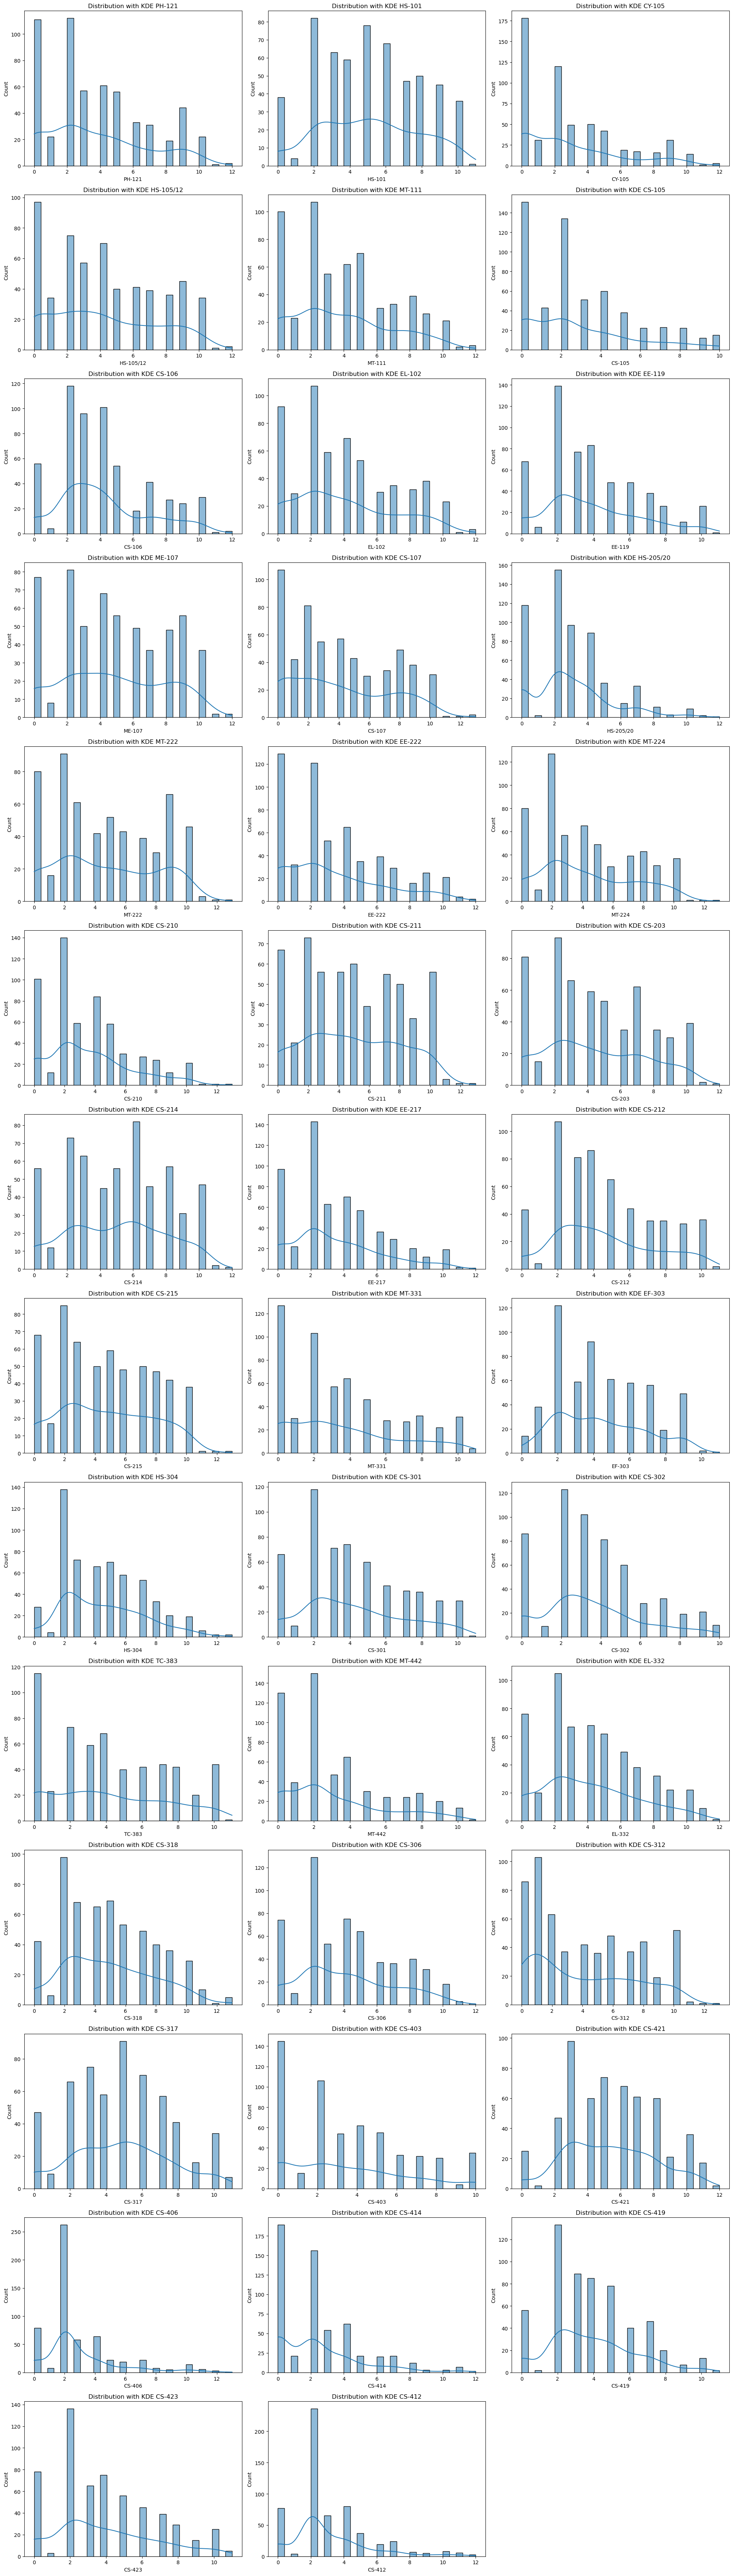

In [702]:
plt.figure(figsize=(20, 70))

col_plt=df_.columns[:-1] #ignore CGPA

for i, col in enumerate(col_plt,1):
    plt.subplot(14,3,i)
    sns.histplot(df_[col], kde=True, bins=30)
    plt.title(f'Distribution with KDE {col}')

plt.tight_layout()
plt.show()

comment:

In [703]:
skewness=df_.skew()
skewness.sort_values()

CGPA        -0.497203
CS-214       0.013129
HS-101       0.053303
ME-107       0.108385
CS-211       0.116085
CS-317       0.140692
CS-215       0.163631
CS-421       0.179508
MT-222       0.193993
CS-203       0.274205
HS-105/12    0.324183
TC-383       0.331652
CS-318       0.356504
EF-303       0.383655
CS-107       0.414846
CS-212       0.414872
CS-301       0.415084
CS-306       0.424753
MT-224       0.430480
CS-312       0.442525
EL-332       0.459160
MT-111       0.484906
EL-102       0.501161
CS-419       0.506748
CS-423       0.526550
HS-304       0.544843
PH-121       0.549104
EE-119       0.574880
CS-302       0.601788
CS-403       0.618339
MT-331       0.627721
CS-106       0.639845
CS-210       0.723967
EE-217       0.724325
EE-222       0.759105
MT-442       0.869952
HS-205/20    0.897186
CS-105       0.930769
CY-105       0.982144
CS-414       1.292931
CS-412       1.329362
CS-406       1.522703
dtype: float64

# Bivariate anaylsis


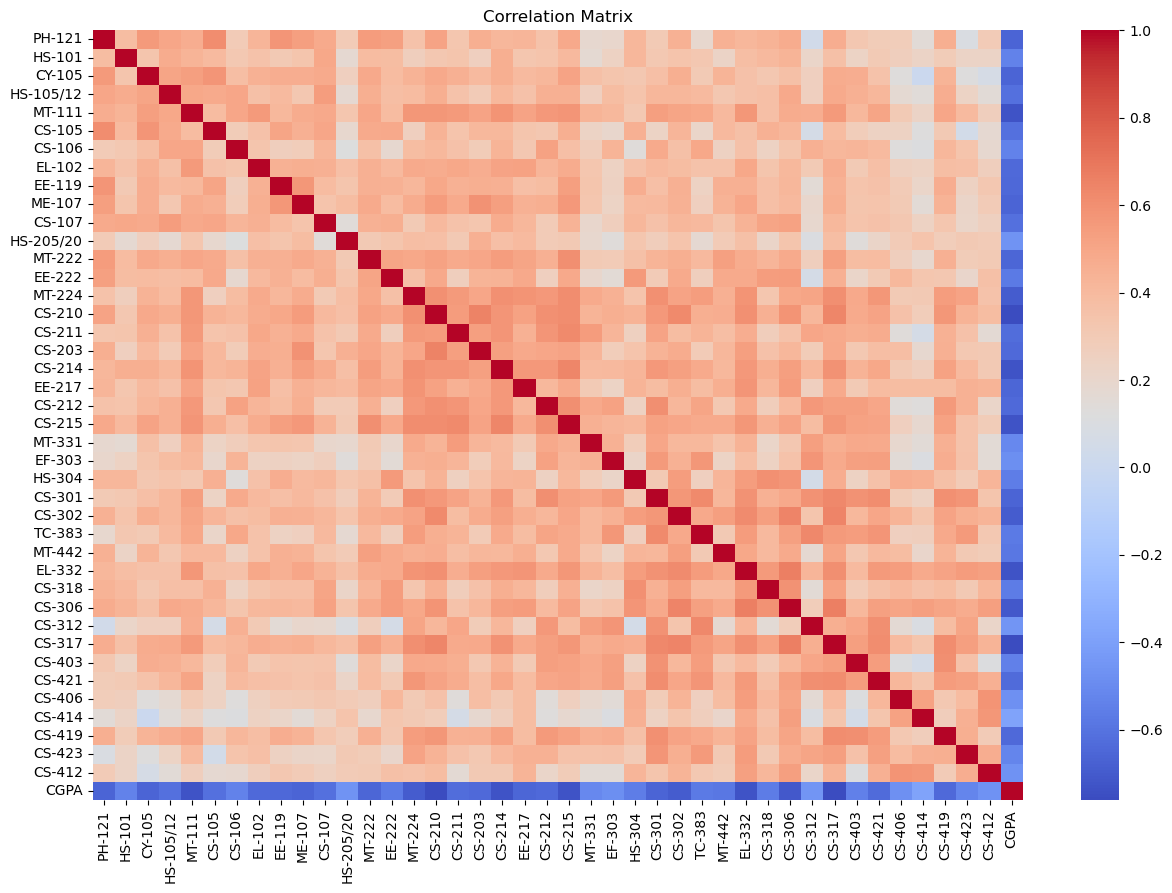

In [704]:
#correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(df_.corr(), annot=False, fmt='.2f',cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

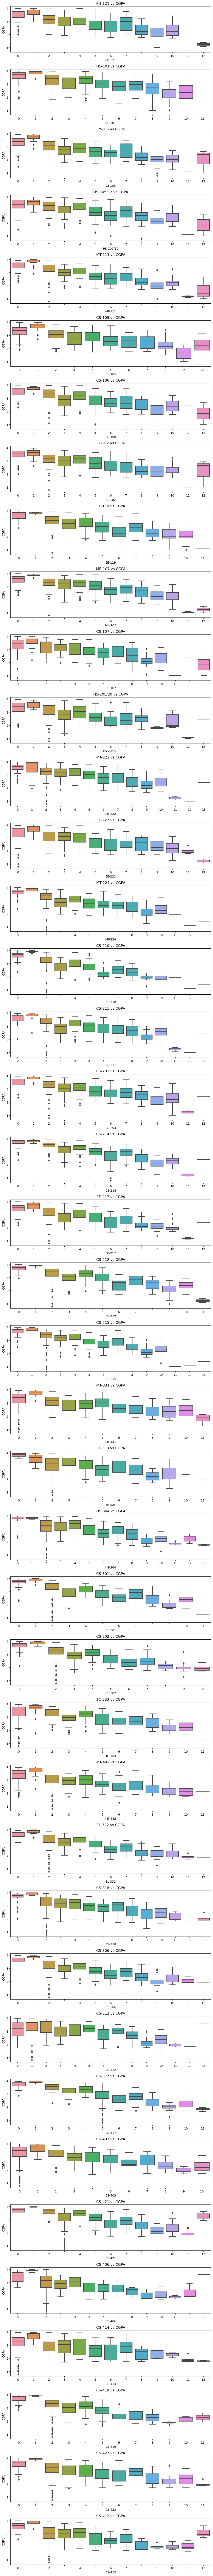

In [705]:
plt.figure(figsize=(10,120))
col_plt_bi=df_.columns.drop(['CGPA'])

for i, col in enumerate(col_plt_bi,1):
    plt.subplot(len(col_plt_bi), 1, i)
    sns.boxplot(x=df_[col], y=df_['CGPA'])
    plt.title(f"{col} vs CGPA")
    plt.xlabel(col)
    plt.ylabel('CGPA')

plt.tight_layout()
plt.show()

as we can see in the above boxplot, there are outliers so i will remove them to do further analysis

___________

__Split data into train and test__

In [726]:
X=df_.drop(columns=['CGPA'])
Y=df_['CGPA']



__scale_features__

In [732]:
scaler=StandardScaler()

X_standard=scaler.fit_transform(X)



__find Z-score__

In [733]:
z_score=np.abs(stats.zscore(X_standard))

threshold=3

mask = (z_score < threshold).all(axis=1)

df_new_X=X_standard[mask]
df_new_Y=Y[mask]

print('Orignial DataFrame Shape:', X.shape)
print('DataFrame Shape after removing outliers', df_new_X.shape)


Orignial DataFrame Shape: (571, 41)
DataFrame Shape after removing outliers (541, 41)


In [734]:
#split data 
X_train, X_test, Y_train, Y_test = train_test_split(df_new_X, df_new_Y, test_size=0.3, random_state=42)

__Train Test Split__

In [769]:
#start model
L_R=LinearRegression()

#create list for results
results_=[]

for i in range(1,501):
    X_train_split,X_test_split,Y_train_split,Y_test_split=train_test_split(X_train,Y_train,test_size=0.3,random_state=i)
    
    L_R.fit(X_train_split, Y_train_split)
    
    predict_train=L_R.predict(X_train_split)
    predict_test=L_R.predict(X_test_split)
    
    train_score=r2_score(Y_train_split,predict_train)
    test_score=r2_score(Y_test_split,predict_test)
        
    results_.append({
        'Random State': i,
        'Train Accuracy': train_score *100,
        'Test Accuracy': test_score*100
          })
train_test_df=pd.DataFrame(results_)

train_test_df_sort=train_test_df.sort_values('Test Accuracy', ascending=False)
train_test_df_sort



,Random State,Train Accuracy,Test Accuracy
117,118,91.183594,97.024654
405,406,91.256619,96.872444
430,431,90.936540,96.832867
42,43,91.173195,96.783744
65,66,91.542448,96.770091
...,...,...,...
431,432,98.750770,71.235617
86,87,98.874027,71.200910
268,269,98.943468,71.108385
16,17,98.651651,70.926922


In [770]:
best_result=train_test_df_sort.iloc[0]

print(f'Best Random State: {best_result["Random State"]}')
print(f'Best Test Accuracy:{best_result["Test Accuracy"]:.2f}%' )

Best Random State: 118.0
Best Test Accuracy:97.02%


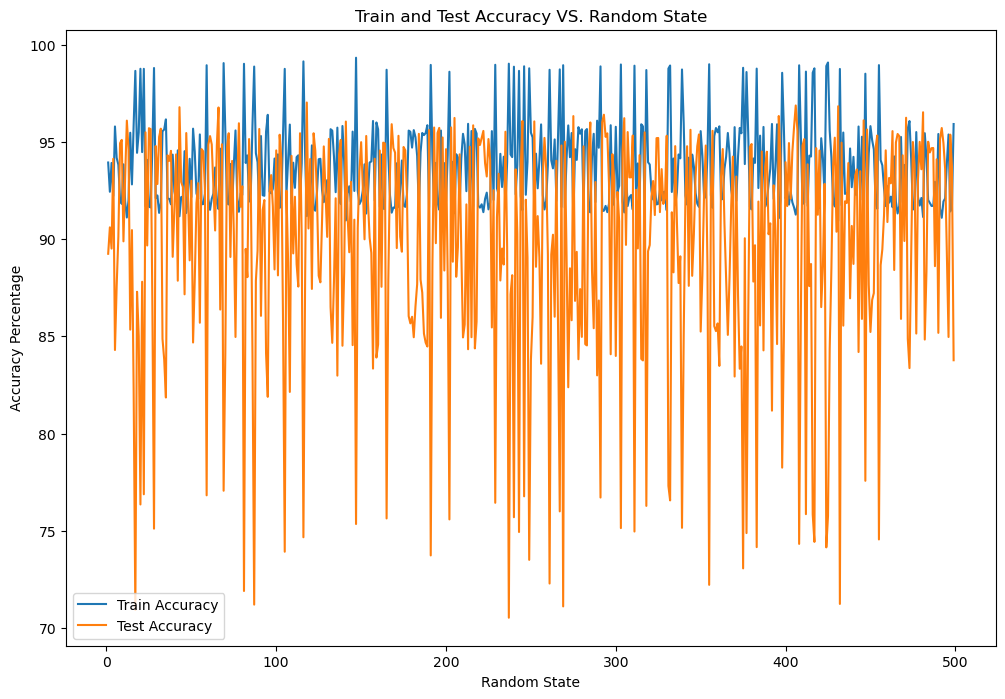

In [771]:
#train vs test

plt.figure(figsize=(12,8))
plt.plot(train_test_df['Random State'], train_test_df['Train Accuracy'], label='Train Accuracy')
plt.plot(train_test_df['Random State'], train_test_df['Test Accuracy'], label='Test Accuracy')
plt.xlabel('Random State')
plt.ylabel('Accuracy Percentage')
plt.title('Train and Test Accuracy VS. Random State')
plt.legend()
plt.show()

In [773]:
#next try randomforest regressor

RF_regressor=RandomForestRegressor()

#create list for results
RF_results=[]

for i in range(1,501):
    X_train, X_test, Y_train, Y_test = train_test_split(df_new_X, df_new_Y, test_size=0.3, random_state=i)
    
    RF_regressor.fit(X_train, Y_train)
    
    predict_train=RF_regressor.predict(X_train)
    predict_test=RF_regressor.predict(X_test)
    
    train_score=r2_score(Y_train,predict_train)
    test_score=r2_score(Y_test,predict_test)
        
    RF_results.append({
        'Random State': i,
        'Train Accuracy': train_score *100,
        'Test Accuracy': test_score*100
          })
RF_train_test_df=pd.DataFrame(RF_results)

RF_train_test_df_sort=RF_train_test_df.sort_values('Test Accuracy', ascending=False)




In [774]:
RF_train_test_df_sort

print(f'Best Random State: {RF_best_result["Random State"]}')
print(f'Best Test Accuracy:{RF_best_result["Test Accuracy"]:.2f}%' )

Best Random State: 196.0
Best Test Accuracy:96.54%


In [775]:
RF_best_random_state

148

In [776]:
RF_best_result=RF_train_test_df_sort.iloc[0]

print(f'Best Random State: {RF_best_result["Random State"]}')
print(f'Best Test Accuracy:{RF_best_result["Test Accuracy"]:.2f}%' )

RF_best_random_state=int(RF_best_random_state)

X_train, X_test, Y_train, Y_test = train_test_split(df_new_X, df_new_Y, test_size=0.3, random_state=RF_best_random_state)

RF_regressor_best=RandomForestRegressor()

RF_regressor_best.fit(X_train, Y_train)

predict_test_best=RF_regressor_best.predict(X_test)

test_score_best=r2_score(Y_test, predict_test_best)
print(f'Best Test Accuracy with Random state {RF_best_random_state}: {test_score_best*100:.2f}%')

Best Random State: 270.0
Best Test Accuracy:96.65%
Best Test Accuracy with Random state 148: 92.55%


In [780]:
print(f'Linear Regression Test Accuracy: {test_score:.2f}%')
print(f'Random Forest Test Accuracy: {test_score_best*100:.2f}%')

Linear Regression Test Accuracy: 0.91%
Random Forest Test Accuracy: 92.55%


In [796]:
param_grid={
    'n_estimators':[100,200,300,400,500],
    'max_depth':[None,10,20,30,40,50],
    'min_samples_split': [2,5,10,15,20]
}

grid_search=GridSearchCV(estimator=RandomForestRegressor(),param_grid=param_grid,cv=5,n_jobs=-1)
grid_search.fit(df_new_X,df_new_Y)


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_split': [2, 5, 10, 15, 20],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [797]:
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_*100:.2f}%')

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 90.72%


In [799]:
RF_regressor_best=grid_search.best_estimator_


In [800]:
predict_test_best=RF_regressor_best.predict(X_test)
test_score_best=r2_score(Y_test, predict_test_best)
print(f'Best Test Accuracy with Grid search: {test_score_best*100:.2f}%')

Best Test Accuracy with Grid search: 99.16%


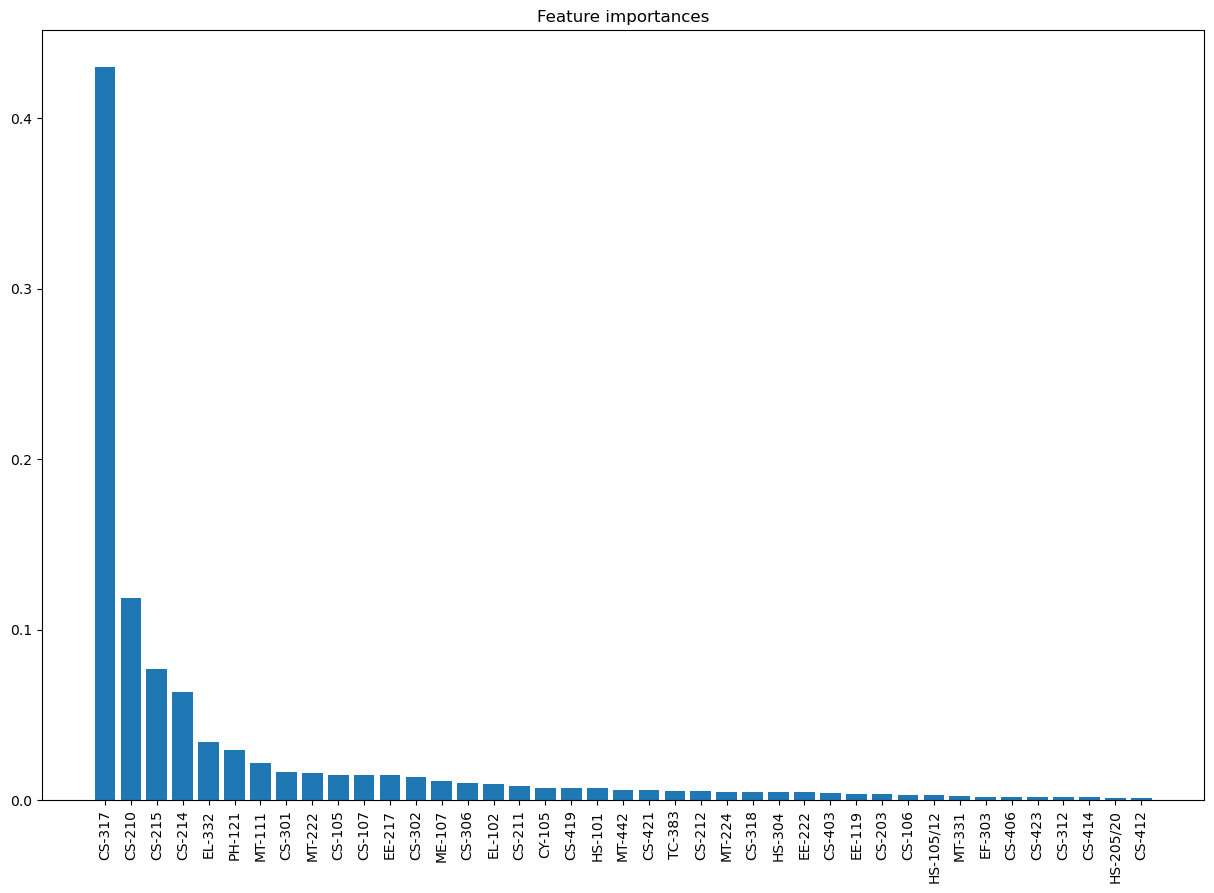

In [808]:
feature_names=['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412']
importance=RF_regressor_best.feature_importances_
sorted_indices=importance.argsort()[::-1]

plt.figure(figsize=(15,10))
plt.title('Feature importances')
plt.bar(range(len(feature_names)), importance[sorted_indices])
plt.xticks(range(len(feature_names)), [feature_names[i] for i in sorted_indices], rotation=90)
plt.show()

In [ ]:
#cross val_scores 